# EDA v2

## Librerías

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno

## Carga de datos

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ChCC
df_ChCC_AP_012 = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/ChCC/ChCC_AP012.xlsx")
df_ChCC_GR_012 = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/ChCC/ChCC_GRP012.xlsx")
df_ChCC_NC = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/ChCC/ChCC_NC.xlsx")
df_ChCC_STD_012 = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/ChCC/ChCC_STD012.xlsx")

# Lazos
df_Lazos_AP_012 = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/Lazos/Lazos_AP012.xlsx")
df_Lazos_AP_teen = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/Lazos/Lazos_APTEEN.xlsx")
df_Lazos_GR_012 = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/Lazos/Lazos_GRP012.xlsx")
df_Lazos_GR_teen = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/Lazos/Lazos_GRPTEEN.xlsx")
#df_Lazos_SEM = pd.read_excel("/content/drive/MyDrive/proyecto PPP/Datos/Datos-Isavo/Lazos/Lazos_SEM.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# Hacemos una copia de las bases
df_C_AP_012 = df_ChCC_AP_012.copy()
df_C_GR_012 = df_ChCC_GR_012.copy()
df_C_NC = df_ChCC_NC.copy()
df_C_STD_012 = df_ChCC_STD_012.copy()
df_L_AP_012 = df_Lazos_AP_012.copy()
df_L_AP_teen = df_Lazos_AP_teen.copy()
df_L_GR_012 = df_Lazos_GR_012.copy()
df_L_GR_teen = df_Lazos_GR_teen.copy()

In [ ]:
# Agregamos el programa de la base
df_C_AP_012["programa"] = "ChCC"
df_C_GR_012["programa"] = "ChCC"
df_C_NC["programa"] = "ChCC"
df_C_STD_012["programa"] = "ChCC"
df_L_AP_012["programa"] = "Lazos"
df_L_AP_teen["programa"] = "Lazos"
df_L_GR_012["programa"] = "Lazos"
df_L_GR_teen["programa"] = "Lazos"

In [ ]:
# Agregamos el tipo de intervencion
df_C_AP_012["nivel"] = "AP"
df_C_GR_012["nivel"] = "GR"
df_C_NC["nivel"] = "NC"
df_C_STD_012["nivel"] = "STD"
df_L_AP_012["nivel"] = "AP"
df_L_AP_teen["nivel"] = "AP"
df_L_GR_012["nivel"] = "GR"
df_L_GR_teen["nivel"] = "GR"

In [ ]:
# Agregamos el rango etario del grupo objetivo del programa
df_C_AP_012["rango etario"] = "012"
df_C_GR_012["rango etario"] = "012"
df_C_NC["rango etario"] = "mixto"
df_C_STD_012["rango etario"] = "012"
df_L_AP_012["rango etario"] = "012"
df_L_AP_teen["rango etario"] = "teen"
df_L_GR_012["rango etario"] = "012"
df_L_GR_teen["rango etario"] = "teen"

In [ ]:
df_C_AP_012.name = "df_C_AP_012"
df_C_GR_012.name = "df_C_GR_012"
df_C_NC.name = "df_C_NC"
df_C_STD_012.name = "df_C_STD_012"
df_L_AP_012.name = "df_L_AP_012"
df_L_AP_teen.name = "df_L_AP_teen"
df_L_GR_012.name = "df_L_GR_012"
df_L_GR_teen.name = "df_L_GR_teen"

In [ ]:
# lista de bases
dfs = [df_C_AP_012, df_C_GR_012, df_C_NC, df_C_STD_012, df_L_AP_012, df_L_AP_teen, df_L_GR_012, df_L_GR_teen]

In [ ]:
df_AP = pd.concat([dfs[0], dfs[4], dfs[5]]) #71 columnas
df_GR = pd.concat([dfs[1], dfs[3], dfs[6], dfs[7]]) # 125 columnas

In [ ]:
# dataframe de todas las bases
df = pd.concat(dfs)

## Paramentros arbitrarios q use uwu
sientanse libres de jugar con estos parametros :)

In [ ]:
# cantidad de bins para los histogramas
bins = [5*i for i in range(21)]

In [ ]:
# umbral para eliminar columnas
porcentaje_completitud = 0.6
n_filas_df = int(round(np.shape(df)[0]*porcentaje_completitud))

## Funciones

In [ ]:
# lista de columnas de un dataframe, formato lista iterable
def lista_columnas(df):
  col = []
  for i in df.columns:
    col.append(i)
  return col

In [ ]:
def ver_columnas(df):
  cols = lista_columnas(df)
  for i in range(len(cols)):
    print(f"{i}.-", cols[i])

In [ ]:
# ver catidad de NA por columna, formato tabla o histograma
def ver_na(df, l=True, h=False, bins = bins):
  columnas = []
  porcentaje_nulos= []
  for i in range(len(df.columns)):
    columnas.append(df.columns[i])
    porcentaje_nulos.append(np.round(df.isna().sum()[i]/np.shape(df)[0]*100))

  if l == True:
    print("Porcentaje de datos nulos")
    for i in range(len(df.columns)):
      print(f"{i}.-", porcentaje_nulos[i])

  if h == True:
    #np.histogram(np.array(porcentaje_nulos))
    plt.hist(np.array(porcentaje_nulos), bins = bins)#, title="columnas según % de NA")
    plt.title("histogram")
    plt.show()

In [ ]:
#  borrar columnas por porcentaje de NA
def filtro_columnas(df, porcentaje): # % es el % de datos nulos permitidos
  NA_X = df.isna().sum()
  columnas_con_datos=[]
  for i in range(len(df.columns)):
    porcentaje_NA = np.round(NA_X[i]/np.shape(df)[0]*100)
    if porcentaje_NA < porcentaje:
      columnas_con_datos.append(df.columns[i])
  return df[columnas_con_datos]

In [ ]:
# borrar filas con NA y ver cuantas sobreviven
def size_tras_drop_na(df, ver = True, ret = False):
  df2 = df.copy()
  df2 = df2.dropna()
  if ver == True:
    display(np.shape(df2))
  if ret == True:
    return(df2)

In [ ]:
def mini_filtro(df, porcentaje):
  print("DATOS PROCESADOS")
  print("histograma de columnas segun porcentaje de NA")
  df2 = filtro_columnas(df, porcentaje)
  ver_na(df2, False, True, 20)
  print("\n")
  print("tamaño de la base:")
  print(size_tras_drop_na(df2))

## Graficos presentación

In [ ]:
df_345 = [filtro_columnas(df_AP, 0.95), filtro_columnas(df_GR, 0.95), filtro_columnas(df_C_NC, 0.95)]

# cantidad de no nulos pre
l_pre = []
l_post = []

n_pre = np.zeros(len(df_345))
n_post = np.zeros(len(df_345))
n_col = np.zeros(len(df_345))


for i in range(len(df_345)):
  #dataframe

  # dataframe i
  df_i = dfs[i]

  # lista de pre para un dataframe
  l_pre.append([])

  # lista de post para un dataframe
  l_post.append([])

  for col in lista_columnas(df_i):
    if "_pre" in col:
      l_pre[i].append(col)
      n_pre[i] += 1

    if "_post" in col and "post only" not in col:
      l_post[i].append(col)
      n_post[i] += 1

  print(len(df_i.columns))


71
110
74


In [ ]:
df_345 = [df_AP, df_GR, df_C_NC]

# cantidad de no nulos pre
l_pre = []
l_post = []

n_pre = np.zeros(len(df_345))
n_post = np.zeros(len(df_345))
n_col = np.zeros(len(df_345))


for i in range(len(df_345)):
  #dataframe

  # dataframe i
  df_i = dfs[i]

  # lista de pre para un dataframe
  l_pre.append([])

  # lista de post para un dataframe
  l_post.append([])

  for col in lista_columnas(df_i):
    if "_pre" in col:
      l_pre[i].append(col)
      n_pre[i] += 1

    if "_post" in col and "post only" not in col:
      l_post[i].append(col)
      n_post[i] += 1

  print(len(df_i.columns))

71
110
74


In [ ]:
n_pre

array([ 5., 18.,  6.])

In [ ]:
l_post[0]

['survey_encuesta de experiencia de parentalidad_apoyo como padre o madre_post',
 'survey_encuesta de experiencia de parentalidad_apoyo de la pareja_post',
 'survey_encuesta de experiencia de parentalidad_conducta infantil_post',
 'survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_post',
 'survey_encuesta de experiencia de parentalidad_experiencias_post']

In [ ]:
n_post

array([ 5., 18.,  6.])

In [ ]:
l_post[0]

['survey_encuesta de experiencia de parentalidad_apoyo como padre o madre_post',
 'survey_encuesta de experiencia de parentalidad_apoyo de la pareja_post',
 'survey_encuesta de experiencia de parentalidad_conducta infantil_post',
 'survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_post',
 'survey_encuesta de experiencia de parentalidad_experiencias_post']

In [ ]:
#for df in dfs:
#  print(df.name)

#  for col in lista_columnas(df):
#    if "pre" in l
#  f
#  print()
#  print("\n")

## Selección de variables

In [ ]:
df.describe()

año     family id  family member id  neighbourhood  complete  \
count  7657.000000   7656.000000       7656.000000            0.0       0.0   
mean   2021.209351   8362.955329       9674.730930            NaN       NaN   
std       0.910106   2844.278497       3086.107059            NaN       NaN   
min    2019.000000   3234.000000       3895.000000            NaN       NaN   
25%    2021.000000   6036.750000       7180.750000            NaN       NaN   
50%    2021.000000   8339.500000       9745.500000            NaN       NaN   
75%    2022.000000  10856.250000      12356.250000            NaN       NaN   
max    2022.000000  14059.000000      15671.000000            NaN       NaN   

       survey_cuestionario de satisfacción del cliente (csq) (post only)_media_  \
count                                       1.300000e+01                          
mean                                        1.007890e+13                          
std                                         2.461836e+13                          
min                                         4.384615e+00                          
25%                                         4.846154e+00                          
50%                                         4.923077e+00                          
75%                                         5.307692e+00                          
max                                         6.769231e+13                          

       survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post  \
count                                       3.424000e+03                              
mean                                        9.876811e+12                              
std                                         2.299812e+13                              
min                                         1.333333e+00                              
25%                                         6.153846e+00                              
50%                                         6.769231e+00                              
75%                                         7.000000e+00                              
max                                         6.923077e+13                              

       survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_  \
count                                          13.000000                        
mean                                            5.615385                        
std                                             0.960769                        
min                                             5.000000                        
25%                                             5.000000                        
50%                                             5.000000                        
75%                                             7.000000                        
max                                             7.000000                        

       survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post  \
count                                        3427.000000                            
mean                                            6.540414                            
std                                             0.877352                            
min                                             1.000000                            
25%                                             6.000000                            
50%                                             7.000000                            
75%                                             7.000000                            
max                                             7.000000                            

       survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_  \
count                                          13.000000                        
mean                                            5.384615                        
std                             

In [ ]:
# Revisión de columnas
ver_columnas(df)

0.- año
1.- family id
2.- family member id
3.- organisation
4.- practitioner
5.- noinhousehold
6.- dd
7.- household
8.- income
9.- neighbourhood
10.- postal
11.- complete
12.- edad
13.- género
14.- beneficio
15.- education
16.- employment
17.- horas
18.- institucion
19.- marital status
20.- relationship
21.- seek professional
22.- seek professional partner
23.- survey_cuestionario de satisfacción del cliente (csq) (post only)_media_
24.- survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post
25.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_
26.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post
27.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_
28.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_post
29.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_
30.- survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_post
31.- survey_c

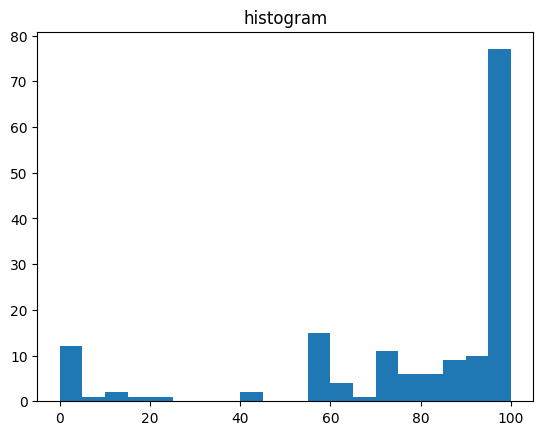

In [ ]:
ver_na(df, l=False, h=True, bins=20)

In [ ]:
df

año  family id  family member id                           organisation  \
0    2021     6378.0            7546.0  ChCC-Municipalidad de Alto del Carmen   
1    2021     6378.0            7547.0  ChCC-Municipalidad de Alto del Carmen   
2    2021     6379.0            7548.0  ChCC-Municipalidad de Alto del Carmen   
3    2021     6379.0            7549.0  ChCC-Municipalidad de Alto del Carmen   
4    2021     6380.0            7550.0  ChCC-Municipalidad de Alto del Carmen   
..    ...        ...               ...                                    ...   
442  2022    12985.0           14572.0               Lazos Triple P Quilicura   
443  2022    13215.0           14818.0           Lazos Triple P Villa Alemana   
444  2022    13217.0           14820.0           Lazos Triple P Villa Alemana   
445  2022    13218.0           14821.0           Lazos Triple P Villa Alemana   
446  2022    13221.0           14824.0           Lazos Triple P Villa Alemana   

                     practitioner noinhousehold  \
0    karolriveragajardo@gmail.com             3   
1    karolriveragajardo@gmail.com             3   
2    karolriveragajardo@gmail.com             4   
3    karolriveragajardo@gmail.com             4   
4    karolriveragajardo@gmail.com             4   
..                            ...           ...   
442   camila.duquearias@gmail.com           5.0   
443  yinelalobossalazar@gmail.com           6.0   
444  yinelalobossalazar@gmail.com           2.0   
445  yinelalobossalazar@gmail.com           3.0   
446  yinelalobossalazar@gmail.com           4.0   

                                           dd  \
0                  Desorden de salud mental,    
1                  Desorden de salud mental,    
2    Condición o impedimento motor (físico),    
3    Condición o impedimento motor (físico),    
4                                         NaN   
..                                        ...   
442                                       NaN   
443           Des√≥rden del especto autista,    
444                                       NaN   
445                Desorden de salud mental,    
446                                       NaN   

                                             household            income  \
0                                                  NaN  $20001 to $30000   
1                                                  NaN  $20001 to $30000   
2    Familia nuclear viviendo con familia extensa (...   Menos de $20000   
3    Familia nuclear viviendo con familia extensa (...   Menos de $20000   
4    Familia nuclear viviendo con familia extensa (...  $20001 to $30000   
..                                                 ...               ...   
442                                                NaN   Menos de $20000   
443  Familia nuclear (padre o madre biol√≥gico o ad...   Menos de $20000   
444                               Familia monoparental   Menos de $20000   
445                                                NaN   Menos de $20000   
446  Familia nuclear (padre o madre biol√≥gico o ad...   Menos de $20000   

     neighbourhood  ...  \
0              NaN  ...   
1              NaN  ...   
2              NaN  ...   
3              NaN  ...   
4              NaN  ...   
..             ...  ...   
442            NaN  ...   
443            NaN  ...   
444            NaN  ...   
445            NaN  ...   
446            NaN  ...   

    survey_escala de estilo parental ‚ adolescentes (psa)_sobrerreactividad_pre  \
0                                                  NaN                            
1                                                  NaN                            
2                                                  NaN                            
3                                                  NaN                            
4                                                  NaN                            
..                                                 ...                            
442         

In [ ]:
# borramos las columnas sin datos
df = df.dropna(axis=1, how="all")

In [ ]:
lista_columnas(df)

['año',
 'family id',
 'family member id',
 'organisation',
 'practitioner',
 'noinhousehold',
 'dd',
 'household',
 'income',
 'postal',
 'edad',
 'género',
 'beneficio',
 'education',
 'employment',
 'horas',
 'institucion',
 'marital status',
 'relationship',
 'seek professional',
 'seek professional partner',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_media_',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_',
 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_post',
 'survey_cuestionario de satisfacción del cliente (csq) (post onl

In [ ]:
# seleccionamos las variables X
x_cols = ['año',
 'family id',
 'family member id',
 'organisation',
 'practitioner',
 'noinhousehold',
 'dd',
 'household',
 'income',
 'postal',
 'edad',
 'género',
 'beneficio',
 'education',
 'employment',
 'horas',
 'institucion',
 'marital status',
 'relationship',
 'seek professional',
 'seek professional partner',
 'programa',
 'nivel',
 'rango etario']

## Tratamiento de Na para variables X, dataframe completo

In [ ]:
df_x = df.copy()
df_x = df_x[x_cols]

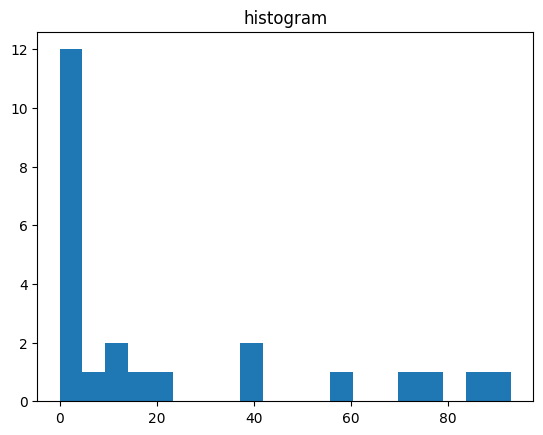

In [ ]:
# na
ver_na(df_x, l=False, h=True, bins=20)

In [ ]:
df_x

año  family id  family member id                           organisation  \
0    2021     6378.0            7546.0  ChCC-Municipalidad de Alto del Carmen   
1    2021     6378.0            7547.0  ChCC-Municipalidad de Alto del Carmen   
2    2021     6379.0            7548.0  ChCC-Municipalidad de Alto del Carmen   
3    2021     6379.0            7549.0  ChCC-Municipalidad de Alto del Carmen   
4    2021     6380.0            7550.0  ChCC-Municipalidad de Alto del Carmen   
..    ...        ...               ...                                    ...   
442  2022    12985.0           14572.0               Lazos Triple P Quilicura   
443  2022    13215.0           14818.0           Lazos Triple P Villa Alemana   
444  2022    13217.0           14820.0           Lazos Triple P Villa Alemana   
445  2022    13218.0           14821.0           Lazos Triple P Villa Alemana   
446  2022    13221.0           14824.0           Lazos Triple P Villa Alemana   

                     practitioner noinhousehold  \
0    karolriveragajardo@gmail.com             3   
1    karolriveragajardo@gmail.com             3   
2    karolriveragajardo@gmail.com             4   
3    karolriveragajardo@gmail.com             4   
4    karolriveragajardo@gmail.com             4   
..                            ...           ...   
442   camila.duquearias@gmail.com           5.0   
443  yinelalobossalazar@gmail.com           6.0   
444  yinelalobossalazar@gmail.com           2.0   
445  yinelalobossalazar@gmail.com           3.0   
446  yinelalobossalazar@gmail.com           4.0   

                                           dd  \
0                  Desorden de salud mental,    
1                  Desorden de salud mental,    
2    Condición o impedimento motor (físico),    
3    Condición o impedimento motor (físico),    
4                                         NaN   
..                                        ...   
442                                       NaN   
443           Des√≥rden del especto autista,    
444                                       NaN   
445                Desorden de salud mental,    
446                                       NaN   

                                             household            income  \
0                                                  NaN  $20001 to $30000   
1                                                  NaN  $20001 to $30000   
2    Familia nuclear viviendo con familia extensa (...   Menos de $20000   
3    Familia nuclear viviendo con familia extensa (...   Menos de $20000   
4    Familia nuclear viviendo con familia extensa (...  $20001 to $30000   
..                                                 ...               ...   
442                                                NaN   Menos de $20000   
443  Familia nuclear (padre o madre biol√≥gico o ad...   Menos de $20000   
444                               Familia monoparental   Menos de $20000   
445                                                NaN   Menos de $20000   
446  Familia nuclear (padre o madre biol√≥gico o ad...   Menos de $20000   

     postal  ...        employment horas institucion marital status  \
0    165000  ...     Media jornada    22          No    Conviviente   
1    165000  ...  Jornada complete    44          No    Conviviente   
2    165000  ...     Media jornada    22          Sí    Conviviente   
3    165000  ...  Jornada complete    44          Sí    Conviviente   
4    165000  ...  Jornada complete    44          No       Casado/a   
..      ...  ...               ...   ...         ...            ...   
442     NaN  ...  Jornada complete    45         S√≠      Soltero/a   
443     NaN  ...  Jornada complete    44         S√≠    Conviviente   
444     NaN  ...  Jornada complete    45         S√≠     Separado/a   
445     NaN  ...                No   NaN         S√≠       Casado/a   
446     NaN  ...  Jornada complete    45         S√≠       Casado/a   

                      relationship seek professional  \
0    Madr

<Axes: >

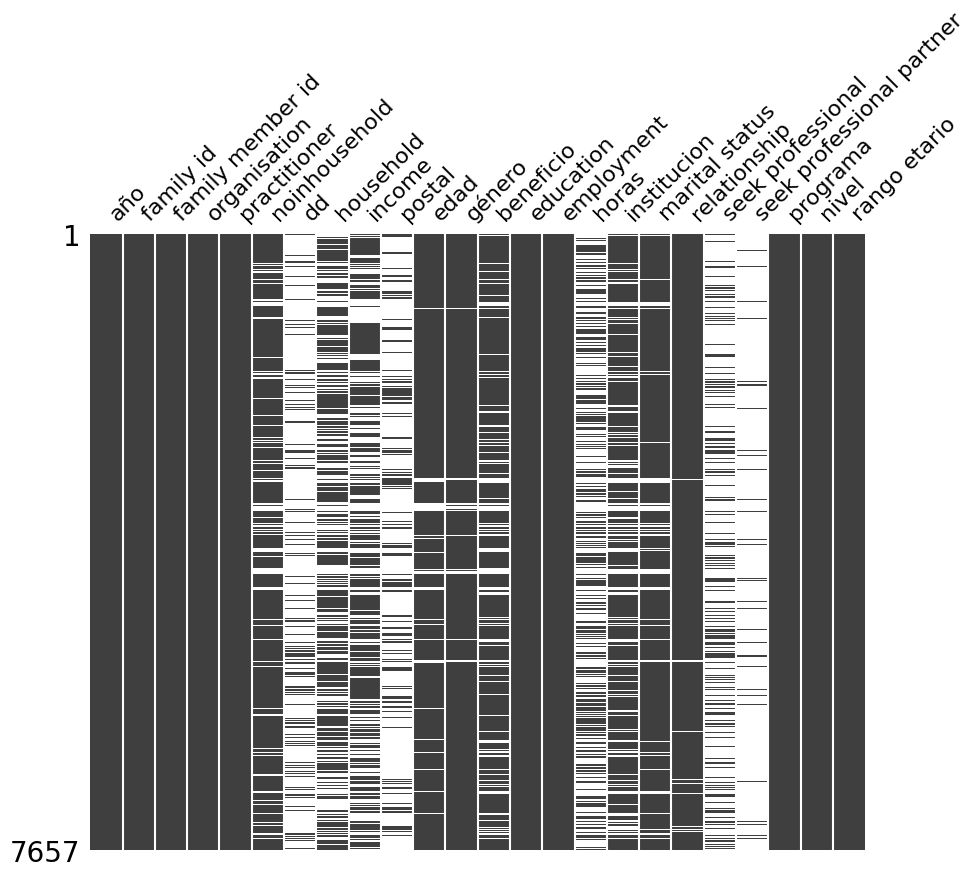

In [ ]:
fig, ax = plt.subplots(figsize=[10, 8])
msno.matrix(df_x, ax=ax, sparkline=False)

In [ ]:
# df_X sin sacar columnas con muchos NA
#df_x.to_csv('/content/drive/MyDrive/proyecto PPP/Datos/Bases unidas/Datasets EDA v2/df_X_con_NA_crudo.csv', encoding='utf-8', index=False)

In [ ]:
ver_na(df_x)

Porcentaje de datos nulos
0.- 0.0
1.- 0.0
2.- 0.0
3.- 0.0
4.- 0.0
5.- 13.0
6.- 84.0
7.- 41.0
8.- 41.0
9.- 78.0
10.- 6.0
11.- 3.0
12.- 18.0
13.- 0.0
14.- 0.0
15.- 57.0
16.- 21.0
17.- 10.0
18.- 2.0
19.- 74.0
20.- 93.0
21.- 0.0
22.- 0.0
23.- 0.0


In [ ]:
df_x = df_x.dropna(axis=1, thresh = n_filas_df)

<Axes: >

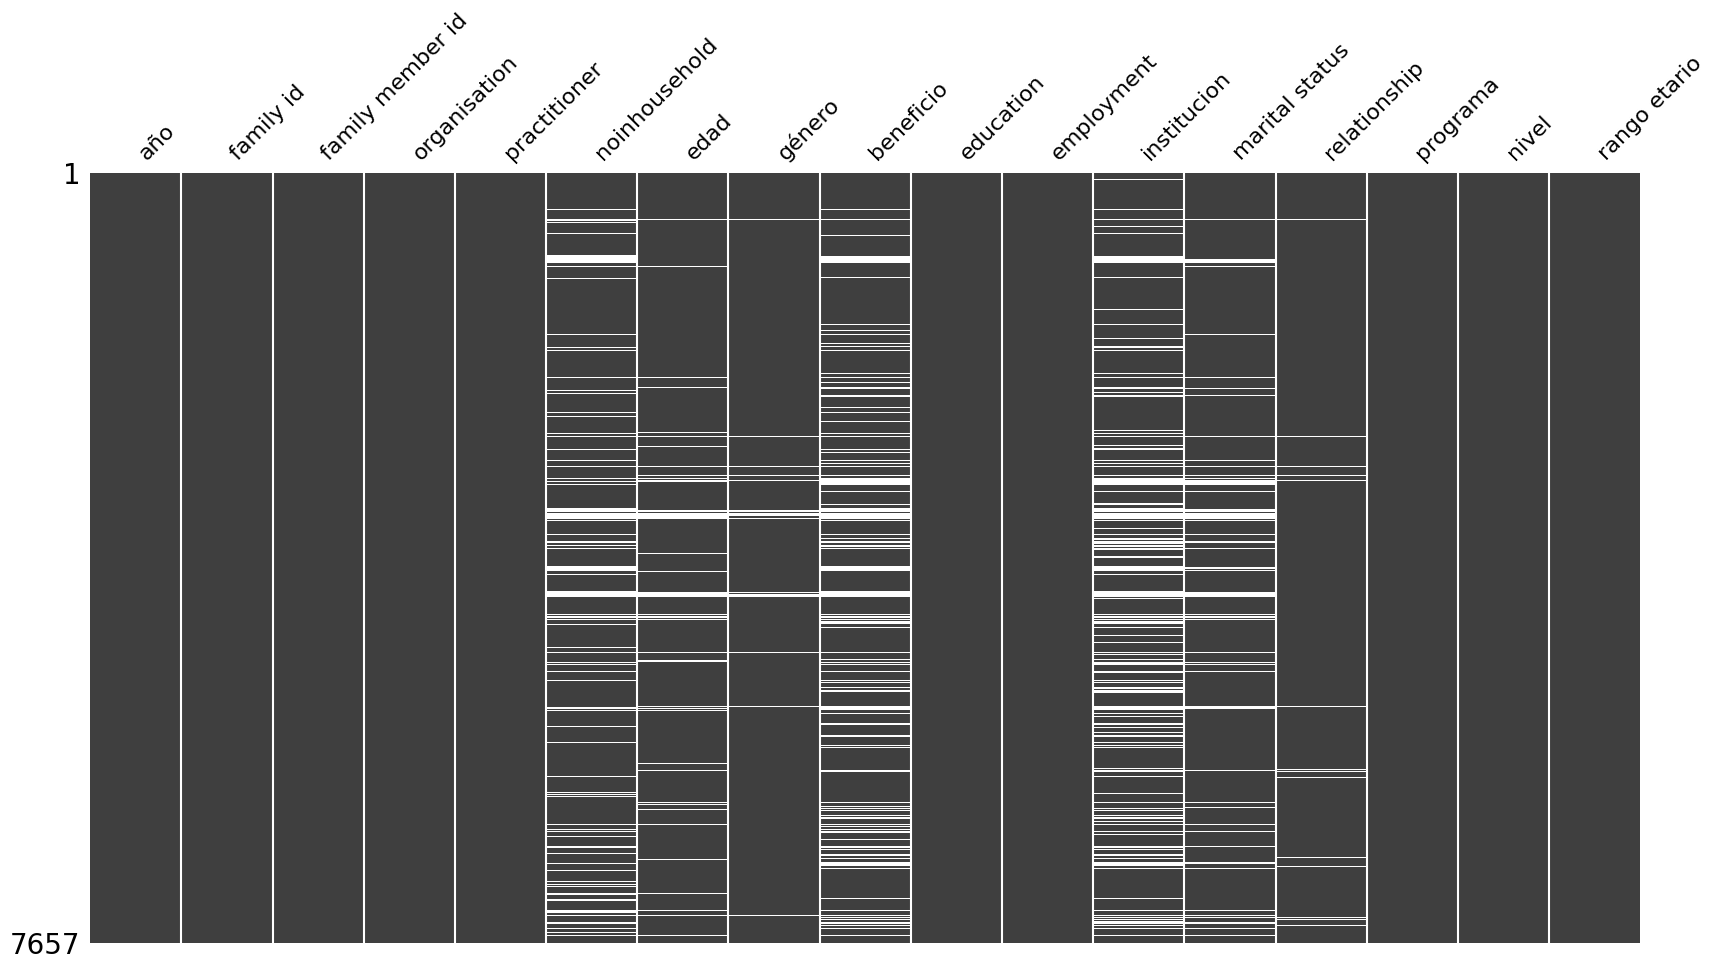

In [ ]:
fig, ax = plt.subplots(figsize=[20, 10])
msno.matrix(df_x, ax=ax, sparkline=False)

In [ ]:
#df_X = df_x.dropna(axis=0, how="any")

# cantidad de filas eliminadas
#print(np.shape(df_x)[0] - np.shape(df_X)[0] )

# porcentaje de filas eliminadas
#print((np.shape(df_x)[0] - np.shape(df_X)[0])/(np.shape(df_x)[0]))

In [ ]:
df_X = df_x.copy()

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7657 entries, 0 to 446
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   año               7657 non-null   int64  
 1   family id         7656 non-null   float64
 2   family member id  7656 non-null   float64
 3   organisation      7656 non-null   object 
 4   practitioner      7656 non-null   object 
 5   noinhousehold     6674 non-null   object 
 6   edad              7195 non-null   object 
 7   género            7459 non-null   object 
 8   beneficio         6279 non-null   object 
 9   education         7656 non-null   object 
 10  employment        7656 non-null   object 
 11  institucion       6045 non-null   object 
 12  marital status    6922 non-null   object 
 13  relationship      7526 non-null   object 
 14  programa          7657 non-null   object 
 15  nivel             7657 non-null   object 
 16  rango etario      7657 non-null   object 
d

In [ ]:
df_X = pd.concat(
    [
        df_X.select_dtypes([], ["object"]),
        df_X.select_dtypes(["object"]).apply(pd.Series.astype, dtype="category"),
    ],
    axis=1,
)

df_X = pd.concat(
    [
        df_X.select_dtypes([], ["float"]),
        df_X.select_dtypes(["object"]).apply(pd.Series.astype, dtype="category"),
    ],
    axis=1,
)

In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7657 entries, 0 to 446
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   año             7657 non-null   int64   
 1   organisation    7656 non-null   category
 2   practitioner    7656 non-null   category
 3   noinhousehold   6674 non-null   category
 4   edad            7195 non-null   category
 5   género          7459 non-null   category
 6   beneficio       6279 non-null   category
 7   education       7656 non-null   category
 8   employment      7656 non-null   category
 9   institucion     6045 non-null   category
 10  marital status  6922 non-null   category
 11  relationship    7526 non-null   category
 12  programa        7657 non-null   category
 13  nivel           7657 non-null   category
 14  rango etario    7657 non-null   category
dtypes: category(14), int64(1)
memory usage: 256.3 KB


In [ ]:
#df_X.to_csv('/content/drive/MyDrive/proyecto PPP/Datos/Bases unidas/Datasets EDA v2/df_X_con_NA.csv', encoding='utf-8', index=False)

## Eliminación de variables por cuestionario

In [ ]:
df_X = pd.concat(
    [
        df_X.select_dtypes([], ["object"]),
        df_X.select_dtypes(["object"]).apply(pd.Series.astype, dtype="category"),
    ],
    axis=1,
)


In [ ]:
#Eliminamos las columnas sin datos
dfs_2 = []
col_eliminadas = []
n_col_eliminadas=[]

for d in range(len(dfs)):
  df_individual = dfs[d]
  print(df_individual.name)

  # Borramos las columnas sin datos
  df2 = df_individual.dropna(axis=1, how="all")
  dfs_2.append(df2)

  # Vemos las columnas borradas
  col_eliminadas.append([])
  for i in range(len(df_individual.columns)):
    col_i = df_individual.columns[i]
    if col_i not in df2.columns:
      col_eliminadas[d].append(col_i)
  print("columnas eliminadas:", col_eliminadas[d])
  print("cantidad de columnas eliminadas:", len(col_eliminadas[d]))
  n_col_eliminadas.append(len(col_eliminadas[d]))

  # Arreglamos el tipo de variable
  df_individual = pd.concat(
    [
        df_individual.select_dtypes([], ["object"]),
        df_individual.select_dtypes(["object"]).apply(pd.Series.astype, dtype="category"),
    ],
    axis=1,
  )
  df_individual["family id"] = df_individual["family id"].astype("category")
  df_individual["family member id"] = df_individual["family member id"].astype("category")

  print("\n")

df_C_AP_012
columnas eliminadas: ['neighbourhood', 'complete', 'survey_encuesta de experiencia de parentalidad_apoyo como padre o madre_', 'survey_encuesta de experiencia de parentalidad_apoyo de la pareja_', 'survey_encuesta de experiencia de parentalidad_conducta infantil_', 'survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_', 'survey_encuesta de experiencia de parentalidad_experiencias_']
cantidad de columnas eliminadas: 7


df_C_GR_012
columnas eliminadas: ['neighbourhood', 'complete', 'survey_cuestionario de fortalezas y dificultades_escala de síntomas emocionales_', 'survey_cuestionario de fortalezas y dificultades_puntaje conducta prosocial_', 'survey_cuestionario de fortalezas y dificultades_puntaje hiperactividad_', 'survey_cuestionario de fortalezas y dificultades_puntaje de dificultades totales_', 'survey_cuestionario de fortalezas y dificultades_puntaje de impacto total_', 'survey_cuestionario de fortalezas y dificultades_puntaje de problemas con 

In [ ]:
# total de columnas borradas
k=0
for n in n_col_eliminadas:
  k+=n
k

180

In [ ]:
len(dfs_2[0].columns)

64

In [ ]:
dfs_3 = []
n_col_eliminadas_v2 = []
col_eliminadas_v2 = []
for i in range(len(dfs_2)):
  df_i = dfs_2[i].copy()

  # Borramos las columnas (post only)
  col_eliminadas_v2.append([])
  for col in lista_columnas(df_i):
    if "(post only)" in col:
      df_i = df_i.drop(columns = col)
      col_eliminadas_v2[i].append(col)

  # Borramos las columnas postal
  for col in lista_columnas(df_i):
    if "postal" in col:
      df_i = df_i.drop(columns = col)
      col_eliminadas_v2[i].append(col)

  n_col_eliminadas_v2.append(len(dfs_2[i].columns) - len(df_i.columns))
  dfs_3.append(df_i)


  print(dfs[d].name)
  print("columnas eliminadas:", col_eliminadas_v2[i])
  print("cantidad de columnas eliminadas:", n_col_eliminadas_v2[i])
  print("\n")

df_L_GR_teen
columnas eliminadas: ['survey_cuestionario de satisfacción del cliente (csq) (post only)_media_', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_media_post', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q10_post', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q11_post', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q12_post', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q13_', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q13_post', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q1_', 'survey_cuestionario de satisfacción del cliente (csq) (post only)_q1_post', 'survey_cuestionario de satisfacción del cliente (c

In [ ]:
# total de columnas borradas
k2=0
for n in n_col_eliminadas_v2:
  k2+=n
k2

158

In [ ]:
k=0
for df in dfs:
  k+=len(df.columns)

print(k)

727


In [ ]:
ncols_inicial = 0
ncols_final = 0
for i in range(len(dfs)):
  ncols_inicial += len(dfs[i].columns)
  ncols_final += len(dfs_3[i].columns)
print("columnas eliminadas:", ncols_inicial - ncols_final)


columnas eliminadas: 338


In [ ]:
# for d in range(len(dfs_3)):
# dfs_3[d].to_csv(f'/content/drive/MyDrive/proyecto PPP/Datos/Bases unidas/Datasets EDA v2/{str(dfs[d].name)}_procesado.csv', encoding='utf-8', index=False)

In [ ]:
for d in dfs_3:
  print(np.shape(d))

(2600, 33)
(2271, 60)
(139, 35)
(726, 77)
(234, 33)
(1056, 33)
(184, 59)
(447, 59)


In [ ]:
df["año"].isna().count()

447

In [ ]:
# cantidad de no nulos pre
l_pre = []

# cantidad de no nulos post
l_post = []

for i in range(len(dfs_3)):
  #dataframe


  # dataframe i
  df_i = dfs_3[i]

  # lista de pre para un dataframe
  l_pre.append([])

  # lista de post para un dataframe
  l_post.append([])

  # cantidad de pre y post para cada dataframe
  k=0
  for col in lista_columnas(df_i):

    if "_pre" in col:
      l_pre[i].append(col)

    if "_post" in col:
      l_post[i].append(col)

    k += 1

  print(dfs[i].name,":" ,k)


df_C_AP_012 : 33
df_C_GR_012 : 60
df_C_NC : 35
df_C_STD_012 : 77
df_L_AP_012 : 33
df_L_AP_teen : 33
df_L_GR_012 : 59
df_L_GR_teen : 59


In [ ]:
#armamaos un dataframe para pre y post por base
dfs_pre = []
dfs_post = []

for i in range(len(dfs_3)):
  df_i = dfs_3[i]

  #pre
  df_i_pre = df_i[l_pre[i]]
  dfs_pre.append(df_i_pre)

  #post
  df_i_post = df_i[l_post[i]]
  dfs_post.append(df_i_post)


In [ ]:
print(dfs[0].name)
print("\n")
display(dfs_pre[0].isna().count())
print("\n")
display(dfs_post[0].isna().count())

print(np.shape(dfs_post[0]))


df_C_AP_012




survey_encuesta de experiencia de parentalidad_apoyo como padre o madre_pre        2600
survey_encuesta de experiencia de parentalidad_apoyo de la pareja_pre              2600
survey_encuesta de experiencia de parentalidad_conducta infantil_pre               2600
survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_pre    2600
survey_encuesta de experiencia de parentalidad_experiencias_pre                    2600
dtype: int64

survey_encuesta de experiencia de parentalidad_apoyo como padre o madre_post        2600
survey_encuesta de experiencia de parentalidad_apoyo de la pareja_post              2600
survey_encuesta de experiencia de parentalidad_conducta infantil_post               2600
survey_encuesta de experiencia de parentalidad_confianza en la parentalidad_post    2600
survey_encuesta de experiencia de parentalidad_experiencias_post                    2600
dtype: int64

(2600, 5)
